In [1]:
from keras.preprocessing import image
import requests
from skimage.segmentation import slic
import matplotlib.pylab as pl
import numpy as np
import shap
import warnings
warnings.filterwarnings("ignore")

# load model data

feature_names = ['covid','normal']
#model = load_model('Resnet18.h5')

In [2]:
cd"dataset3"

/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-le-ins5/code/dataset3


In [3]:
from keras.models import load_model

In [4]:
#ls

In [5]:
model18 = load_model('Resnet18.h5')

In [6]:
model169=load_model('Dense169.h5')

In [7]:
model_x=load_model('Xception.h5')

In [8]:
num_networks = 3

In [9]:
num_iterations = 10

In [10]:
def random_training_set():
    # Create a randomized index into the full / combined training-set.
    idx = np.random.permutation(combined_size)

    # Split the random index into training- and validation-sets.
    idx_train = idx[0:train_size]
    idx_validation = idx[train_size:]

    # Select the images and labels for the new training-set.
    x_train = combined_images[idx_train, :]
    y_train = combined_labels[idx_train, :]

    # Select the images and labels for the new validation-set.
    x_validation = combined_images[idx_validation, :]
    y_validation = combined_labels[idx_validation, :]

    # Return the new training- and validation-sets.
    return x_train, y_train, x_validation, y_validation

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
# with open(MODEL_SUMMARY_FILE2,"w") as fh:
#     model.summary(print_fn=lambda line: fh.write(line + "\n"))

training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [17]:
# Hyperparams
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS =15
BATCH_SIZE =30
TEST_SIZE = 2
learning = 0.0001
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [20]:
cd-

/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-le-ins5/code


In [21]:
cd"dataset1"

/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-le-ins5/code/dataset1


In [22]:
# 
training_data_dir ="train" # 
validation_data_dir = "test" #
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False)

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
Y_pred = model_x.predict_generator(validation_generator,(nb_samples//BATCH_SIZE))
y_pred = np.argmax(Y_pred, axis=1)

In [54]:
pred1=model18.predict(validation_generator,(nb_samples//BATCH_SIZE))

In [55]:
pred1.shape

(480, 2)

In [67]:
y_pred1 = np.argmax(pre, axis=1)

In [56]:
pred2=model169.predict(validation_generator,(nb_samples//BATCH_SIZE))

In [ ]:
pred2.shape

In [57]:
pred3=model_x.predict(validation_generator,(nb_samples//BATCH_SIZE))

In [58]:
pred3.shape

(480, 2)

In [59]:
finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)

In [61]:
finalpred.shape

(480, 2)

In [62]:
pre=np.round(finalpred)

In [63]:
pre.shape

(480, 2)

In [53]:
(validation_generator.classes).shape

(480,)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [49]:
def show_confusion_matrix(validations, predictions):
    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

In [69]:
import matplotlib.pyplot as plt

In [71]:
import seaborn as sns

In [74]:
print('Classification Report')
target_names = ["covid-19","normal"]
print(classification_report(validation_generator.classes, y_pred1, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    covid-19       0.99      1.00      1.00       130
      normal       1.00      1.00      1.00       350

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



Confusion Matrix


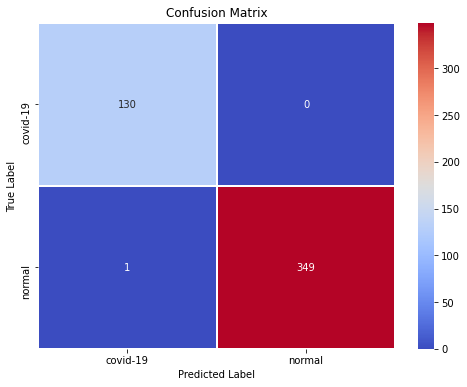

[[130   0]
 [  1 349]]


In [73]:
LABELS = ["covid-19","normal"]
print('Confusion Matrix')
show_confusion_matrix(validation_generator.classes, y_pred1)
print(confusion_matrix(validation_generator.classes,y_pred1))

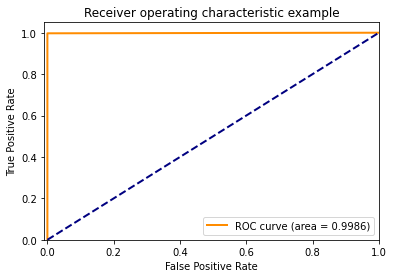

In [75]:
# Plot linewidth.
lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
   fpr[i], tpr[i], _ = roc_curve(validation_generator.classes, y_pred1)
   roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
       lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()